## Linear Regression & Stats

We now want to utilize the insight gained from informative analytics to PREDICTIVE ANALYTICS 
This is also known as machine-learning, statistical-learning, model-fitting, etc
Our study of data analytics will entail…

* Linear regression
* Polynomial regression
* Error Reduction in Linear Regression

Let's analyze facebook data from 2014 (back when facebook was cool). Data pulled from: https://archive.ics.uci.edu/ml/datasets/Facebook+metrics

Let's focus on predicting on total "interactions."

In [80]:
import pandas as pd

fbdf = pd.read_csv("../data/dataset_Facebook.csv")

fbdf.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [81]:
fbdf_clean = fbdf.drop(labels=["Type", "Category", "Post Month", "Post Weekday", "Post Hour"], axis=1)
fbdf_clean.columns = ["tot_likes", "paid", "tot_reach", "tot_impressions", "engaged_users", "post_consumers", "post_consumptions", 
                      "tot_impressions_from_like", "tot_reach_from_like", "tot_engage_from_like", "comments", "likes", "shares", "interactions"]
fbdf_clean.head()

,tot_likes,paid,tot_reach,tot_impressions,engaged_users,post_consumers,post_consumptions,tot_impressions_from_like,tot_reach_from_like,tot_engage_from_like,comments,likes,shares,interactions
0,139441,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


## Workflow

1. EDA
2. Transforming
3. Predicting
4. Measuring & Tuning

## EDA

We always do EDA before starting with any statistical learning model.

This could entail univariate EDA:

* Distribution analysis
* Tests for normality
* Histogram/boxplot generation

Or bivariate EDA:
* Scatter plot generation
* T-Tests/Z-Tests
* Correlation map  


From there, we continue normalizing our data or deciding on which features we want to focus on. This is largely a creative process and will rely on your knowledge of tools & techniques. 

**New Definition**
Correlation is a measure ranging from -1 to 1 that indicates how closely related two independent variables are.

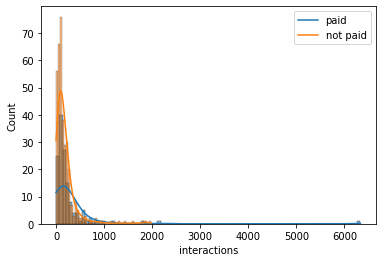

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

paid = fbdf_clean[fbdf_clean["paid"] == 1]
nopaid = fbdf_clean[fbdf_clean["paid"] == 0]

# light EDA
sns.histplot(paid["interactions"], kde=True)
sns.histplot(nopaid["interactions"], kde=True)
plt.legend(labels=["paid", "not paid"])
plt.show()

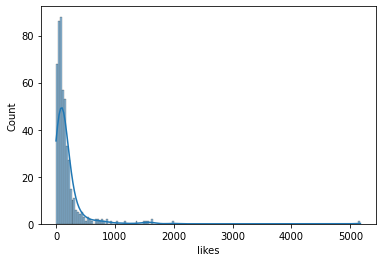

In [83]:
sns.histplot(fbdf_clean["likes"], kde=True)
plt.show()

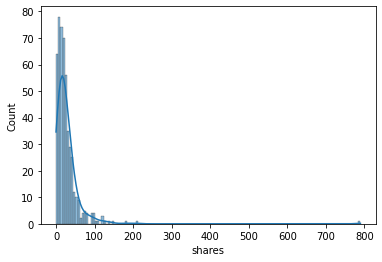

In [84]:
sns.histplot(fbdf_clean["shares"], kde=True)
plt.show()

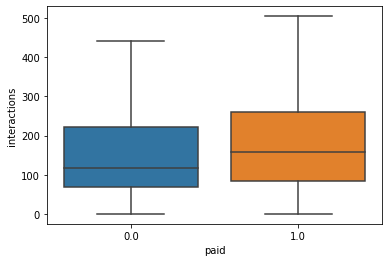

In [85]:
sns.boxplot(data=fbdf_clean, y="interactions", x="paid", showfliers=False)
plt.show()

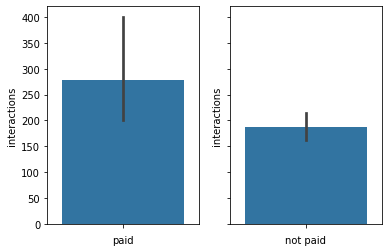

In [86]:
fig, axes = plt.subplots(1, 2, sharey=True)

# make standard deviation of count graph one on top of another
sns.barplot(data=paid, y="interactions", estimator='mean', errorbar=('ci', 95),  ax=axes[0])
sns.barplot(data=nopaid, y="interactions", estimator='mean', errorbar=('ci', 95),  ax=axes[1])

axes[0].set_xlabel("paid")
axes[1].set_xlabel("not paid")

plt.show()

In [87]:
stats.ttest_ind(paid["interactions"], nopaid["interactions"])

Ttest_indResult(statistic=2.415943733437801, pvalue=0.0160540243629609)

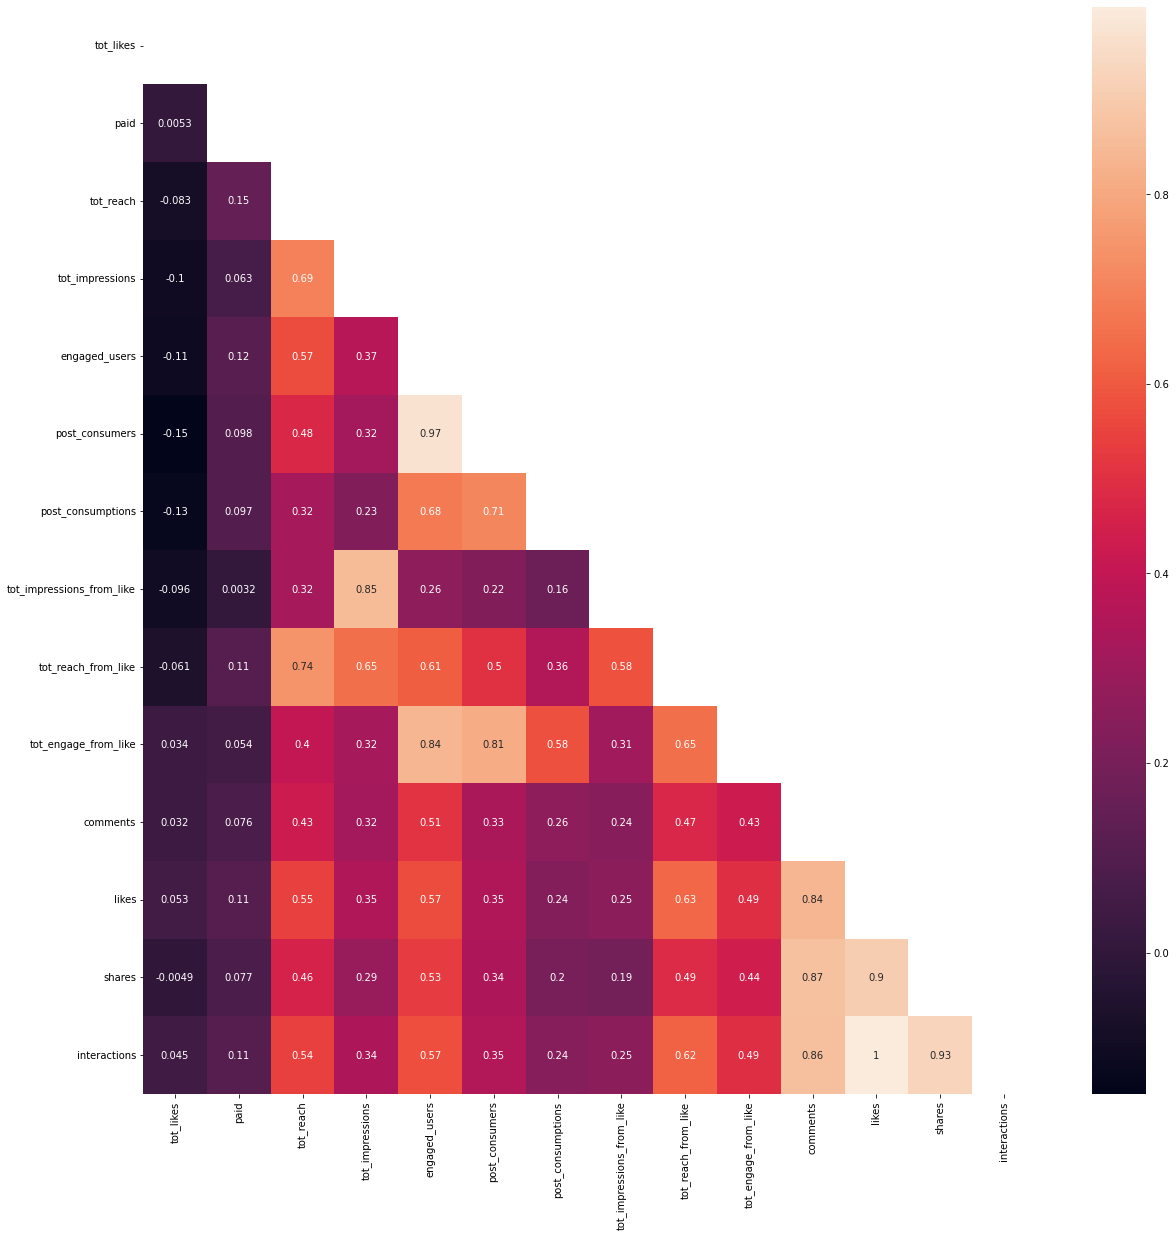

In [88]:
import numpy as np

# more info on generating this heatmap: https://www.geeksforgeeks.org/how-to-create-a-triangle-correlation-heatmap-in-seaborn-python/
mask = np.triu(np.ones_like(fbdf_clean.corr())) 

plt.figure(figsize=(20,20))
sns.heatmap(fbdf_clean.corr(), annot=True, mask=mask)
plt.show()

## Transformation - Normalization Techniques

We want to keep apply the following normalization patterns to observed values:

Outlier removal 
* Usage: skewed data
* Risk: Outliers are important
* Methods: Z-score, clipping via upper & lower fence

Dataset splitting
* Usage: bimodal data
* Risk: hidden or unrecorded classes of data
* Methods: Manual dataset filtering

Log-Scaling
* Usage: exponential data
* Risk: negative values in dataset
* Methods: Applying natural log to each data-point


While we want to make an intelligent decision to these methods, we should also consider all to find which one brings us closer to normality.

<AxesSubplot:xlabel='interactions', ylabel='Count'>

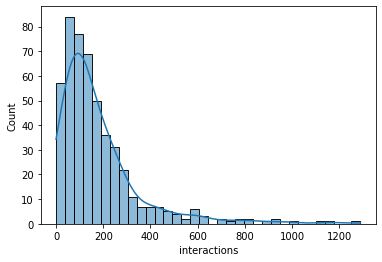

In [89]:
import scipy.stats as stats
import numpy as np

# remove data past 3 z-scores for the target variable

fbdf_clean = fbdf_clean[(np.abs(stats.zscore(fbdf_clean["interactions"])) < 3)]
sns.histplot(fbdf_clean["interactions"], kde=True)

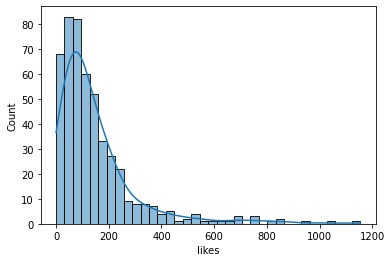

In [90]:
# notice how a normalization technique applying to one column results in the other columns...
# do not assume this! 
sns.histplot(fbdf_clean["likes"], kde=True)
plt.show()

<AxesSubplot:xlabel='interactions', ylabel='Count'>

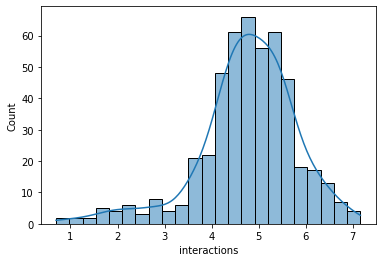

In [125]:
# maybe try log normalization...
fbdf_clean_log["interactions"] = fbdf_clean_log["interactions"].apply(lambda x: np.log(x))
sns.histplot(fbdf_clean_log["interactions"], kde=True)

In [126]:
fbdf_clean_log = fbdf_clean_log[np.isfinite(fbdf_clean_log["interactions"])]

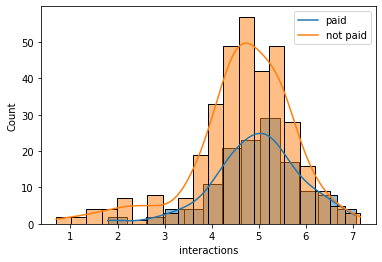

In [127]:
paid_log = fbdf_clean_log[fbdf_clean_log["paid"] == 1]
nopaid_log = fbdf_clean_log[fbdf_clean_log["paid"] == 0]

# light EDA
sns.histplot(paid_log["interactions"], kde=True)
sns.histplot(nopaid_log["interactions"], kde=True)
plt.legend(labels=["paid", "not paid"])
plt.show()

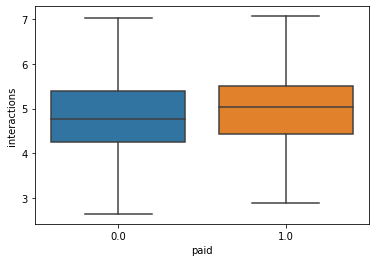

In [128]:
sns.boxplot(data=fbdf_clean_log, y="interactions", x="paid", showfliers=False)
plt.show()

## Transformations - Feature Engineering

Sometimes we also want to rope in domain experts or do background research to generate new columns (features) that might reveal latent variables (hidden variables)

Potential Ideas  
3 Point Shooting Percentage = Successes/Attempts  
Profit = Revenue - Cost  
Etc…  


## Predicting - Splitting Data

We always want to generate two (at minimum) sets of data:

Train set: A dataset to train your model on
Test set: A dataset to test your model on

We usually rely on an (80-20) split or (75-25). We utilize ONLY the test set for calculating metrics.


In [129]:
from sklearn.model_selection import train_test_split

# some last minute cleaning..
fbdf_clean_log.dropna(inplace=True)

X = fbdf_clean_log[["paid"]]
y = fbdf_clean_log["interactions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

C:\Users\saidmf\AppData\Local\Temp\ipykernel_23456\995429351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fbdf_clean_log.dropna(inplace=True)


## Predicting - Training Model

Next, we simply "train" the model by fitting our X_Train and Y_Train.

In [130]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

# R2 of 1%...

0.018565472435562058

In [131]:
y_pred = reg.predict(X_test).reshape(-1, 1)

reg.score(X_test, y_test)

# but in reality! R2 of -0.04????
# good sign our model is abysmal

-0.010275757722057577

## Predicting - Feature Selection via Correlation Mapping & Hypothesis Tests

While we should continue applying our normalizations, we will progress to selecting features.

Forward Selection: Generate your model with ALL features, and hand-pick features to delete by checking collinearity & p-values 

Backward Selection: Generate your model with ONE features, and hand-pick features to add by checking collinearity & p-values.

Mixed Selection: Generate your model with ONE features, and hand-pick features to add by checking collinearity & p-values. Iteratively decide to remove features as well

In [132]:
X = fbdf_clean_log[["paid", "comments", "likes", "shares"]]
y = fbdf_clean_log["interactions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# this should be done immediately after log-normalizing
y_train[~np.isfinite(y_train)] = 0
y_test[~np.isfinite(y_test)] = 0

reg2 = LinearRegression()
reg2.fit(X_train, y_train)

# never rely on this!
reg2.score(X_train, y_train)

0.6293060490434204

Instead, rely on test...

In [133]:
reg2.score(X_test, y_test)

0.6869324650392488

## Forward Selection

Here is a more steadfast method of forward feature selection in linear regression.  

1. Start out with one hand-picked feature.  
2. Repeat in loop until you hit a plateau of accuracy  
    1. Fit and predict on 80-20 split data  
    2. Test model and generate R2 value  
    3. Choose another feature that does not have high correlation with your previous feature.  


In [134]:
r2_vals = []

X_cols = list(fbdf_clean_log.columns).remove("interactions")

X = fbdf_clean_log[["comments"]]
y = fbdf_clean_log["interactions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

r2 = reg.score(X_test, y_test)
r2_vals.append(r2)
print(r2)

0.2374527136092498


In [135]:
X = fbdf_clean_log[["comments", "post_consumptions"]]
y = fbdf_clean_log["interactions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

r2 = reg.score(X_test, y_test)
r2_vals.append(r2)
print(r2)

0.2536697979573763


In [136]:
X = fbdf_clean_log[["comments", "post_consumptions", "tot_engage_from_like"]]
y = fbdf_clean_log["interactions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

r2 = reg.score(X_test, y_test)
r2_vals.append(r2)

In [137]:
print(r2)

0.3429145117370852


In [138]:
X = fbdf_clean_log[["likes", "post_consumptions", "tot_engage_from_like"]]
y = fbdf_clean_log["interactions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

r2 = reg.score(X_test, y_test)
r2_vals.append(r2)
print(r2)

0.6241848183440604


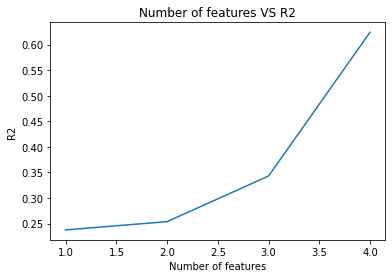

In [139]:
plt.plot([1, 2, 3, 4], r2_vals)
plt.xlabel('Number of features')
plt.ylabel('R2')
plt.title("Number of features VS R2")
plt.show()

## Backward Selection

Here is a more steadfast method of backward feature selection in linear regression.
1. Start out with all features
2. Repeat in loop until you hit a plateau of accuracy
    1. Fit and predict on 80-20 split data
    2. Test model and generate R2 value
    3. Choose a feature that displays low significance (p-value) or high collinearity with other features to remove

In [140]:
from sklearn.feature_selection import f_regression

r2_vals = []

X_cols = list(fbdf_clean_log.columns)
X_cols.remove("interactions")

X = fbdf_clean_log[X_cols]
y = fbdf_clean_log["interactions"]

freg=f_regression(X,y)

for i, name in enumerate(X.columns):
    print(name, end=": ")
    print(round(freg[1][i], 10))

tot_likes: 0.2308899416
paid: 0.0055001587
tot_reach: 0.0
tot_impressions: 1.0464e-06
engaged_users: 0.0
post_consumers: 0.0
post_consumptions: 4.9916e-06
tot_impressions_from_like: 0.000272014
tot_reach_from_like: 0.0
tot_engage_from_like: 0.0
comments: 0.0
likes: 0.0
shares: 0.0


In [141]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

r2 = reg.score(X_test, y_test)
r2_vals.append(r2)
print(r2)

0.6759759856672349


In [142]:
# remove non-sig feature
X_cols.remove("tot_likes")
X = fbdf_clean_log[X_cols]
y = fbdf_clean_log["interactions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

r2 = reg.score(X_test, y_test)
r2_vals.append(r2)
print(r2)

0.6765671137902534


In [143]:
# remove multi-colinear
X_cols.remove("engaged_users")
X = fbdf_clean_log[X_cols]
y = fbdf_clean_log["interactions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

r2 = reg.score(X_test, y_test)
r2_vals.append(r2)
print(r2)

0.6840221758836136


In [144]:
# remove multi-colinear
X_cols.remove("post_consumers")
X = fbdf_clean_log[X_cols]
y = fbdf_clean_log["interactions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

r2 = reg.score(X_test, y_test)
r2_vals.append(r2)
print(r2)

0.6857931156852424


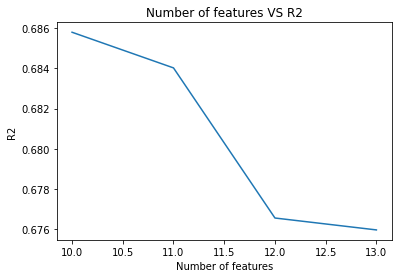

In [145]:
plt.plot([13, 12, 11, 10], r2_vals)
plt.xlabel('Number of features')
plt.ylabel('R2')
plt.title("Number of features VS R2")
plt.show()

## Measuring & Tuning - Scores

To get the accuracy of our linear regression model, we often rely on two scores:

* Mean Squared Error: MSE often generates gigantic values, so we rely on R2 to standardize it
* R2: Another name for R2 is coeff of determination

In [146]:
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

0.2746062316221161

## Additional Linear Regression Models

* Polynomial Regression : https://data36.com/polynomial-regression-python-scikit-learn/
* The LASSO (Least Absolute Shrinkage and Selection Operator): https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/
    * This is a great method that minimizes coefficients that lead to the greatest error in our model!
    * We simply plug in all variables and it does the work!
    * This also removes multicollinearity ! :O

## The Lasso

"Lasso regression is a machine learning algorithm that can be used to perform linear regression while also reducing the number of features used in the model. Lasso stands for least absolute shrinkage and selection operator. Pay attention to the words, “least absolute shrinkage” and “selection”. We will refer to it shortly. Lasso regression is used in machine learning to prevent overfitting. It is also used to select features by setting coefficients to zero. Lasso regression is also called L1-norm regularization."

https://vitalflux.com/lasso-ridge-regression-explained-with-python-example/

In [147]:
from sklearn.linear_model import Lasso

# get all features

X_cols = list(fbdf_clean_log.columns)
X_cols.remove("interactions")

X = fbdf_clean_log[X_cols]
y = fbdf_clean_log["interactions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# attempt linear regression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.6759759856672349

In [148]:
# attempt LASSO regression. Alpah indicates how large of a penalty we want to impose on large coefficinets
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

lasso.score(X_test, y_test)

0.6818695990368613

In [151]:
for i, name in enumerate(X.columns):
    print(name, end=": ")
    print(round(reg.coef_[i], 10))

tot_likes: 2.4873e-06
paid: 0.1376564487
tot_reach: -2.937e-06
tot_impressions: 1.816e-06
engaged_users: 0.0014044432
post_consumers: -0.0013374002
post_consumptions: 8.7092e-06
tot_impressions_from_like: -1.5158e-06
tot_reach_from_like: 1.12274e-05
tot_engage_from_like: 8.747e-06
comments: 0.0038345217
likes: 0.0012921254
shares: 0.0208202644


In [159]:
for i, name in enumerate(X.columns):
    print(name, end=": ")
    print(round(lasso.coef_[i], 10))

tot_likes: 2.7657e-06
paid: 0.0
tot_reach: -1.7286e-06
tot_impressions: 1.5559e-06
engaged_users: 0.0005989754
post_consumers: -0.000526028
post_consumptions: 6.8201e-06
tot_impressions_from_like: -1.3003e-06
tot_reach_from_like: 1.05034e-05
tot_engage_from_like: -1.1899e-05
comments: 0.0021949663
likes: 0.0021293211
shares: 0.0192673114


## Try it Yourself!

Apply the same workflow to the following dataset that descriptions real estate in Taiwan: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set.

Aim to generate a linear regression model of optimal accuracy. Compare the accuracy to a LASSO model.

In [154]:
import pandas as pd

fbdf = pd.read_csv("../data/realestate.csv")

fbdf.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [155]:
## Implement EDA here!



In [156]:
## Implement feature selection here! 



In [157]:
## Implement various regression models here!



In [158]:
## measure accuracy!



## Sprint 2

Your only task for this week is to work on and complete your minimal viable model:


## Minimal Viable Model Example

